In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

from datetime import datetime
from dateutil.parser import parse

# Data Pre-Processing

In [2]:
# import Prosper data for analysis 
LC_Data = pd.read_csv('prosperLoanData.csv', low_memory=False)

In [3]:
#print data shape
print(LC_Data.shape)

(113937, 81)


In [4]:
#print data head
LC_Data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
#print total column list 
LC_Data.columns.tolist()

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (p

In [6]:
#import data dictionary
LC_Data_Dictionary = pd.read_csv('Prosper Loan Data - Variable Definitions.csv',encoding= 'unicode_escape')

In [7]:
#print data shape
print(LC_Data_Dictionary.shape)

(81, 2)


In [8]:
#print data head
LC_Data_Dictionary.head()

,Variable,Description
0,ListingKey,"Unique key for each listing, same value as the..."
1,ListingNumber,The number that uniquely identifies the listin...
2,ListingCreationDate,The date the listing was created.
3,CreditGrade,The Credit rating that was assigned at the tim...
4,Term,The length of the loan expressed in months.


In [9]:
#keep column which has less then 50% null value
LC_Data_Dictionary_Update = LC_Data_Dictionary.loc[:, LC_Data_Dictionary.isnull().sum() < 0.5*LC_Data_Dictionary.shape[0]]

In [10]:
#print data dictionary shape
print(LC_Data_Dictionary_Update.shape)

(81, 2)


In [11]:
#print data dictionary head after removing null column 
LC_Data_Dictionary_Update.head()

,Variable,Description
0,ListingKey,"Unique key for each listing, same value as the..."
1,ListingNumber,The number that uniquely identifies the listin...
2,ListingCreationDate,The date the listing was created.
3,CreditGrade,The Credit rating that was assigned at the tim...
4,Term,The length of the loan expressed in months.


In [12]:
##print number of column name
print(LC_Data_Dictionary_Update.columns.tolist())

['Variable', 'Description']


In [13]:
#rename data dectionary
LC_Data_Dictionary_Update = LC_Data_Dictionary_Update.rename(columns={'Variable': 'Variable Name', 'Description': 'Description'})

In [14]:
#to check the sum of null values in each column
LC_Data.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [15]:
#Dropping all columns with 50% missing values
LC_Data_Updated = LC_Data.loc[:, LC_Data.isnull().sum() < 0.5*LC_Data.shape[0]]

In [16]:
#print data shape
print(LC_Data_Updated.shape)

(113937, 69)


In [17]:
#merge data set with data dictionary with new shape 
LC_Data_Explanation = pd.DataFrame(LC_Data_Updated.dtypes,columns=['dtypes'])
LC_Data_Explanation = LC_Data_Explanation.reset_index()
LC_Data_Explanation['Variable Name'] = LC_Data_Explanation['index']
LC_Data_Explanation = LC_Data_Explanation[['Variable Name','dtypes']]
LC_Data_Explanation['first value'] = LC_Data_Updated.loc[0].values
LC_Variables_Explained = LC_Data_Explanation.merge(LC_Data_Dictionary_Update, on='Variable Name',how='left')

In [18]:
#print data head after marged
LC_Variables_Explained.head()

,Variable Name,dtypes,first value,Description
0,ListingKey,object,1021339766868145413AB3B,"Unique key for each listing, same value as the..."
1,ListingNumber,int64,193129,The number that uniquely identifies the listin...
2,ListingCreationDate,object,2007-08-26 19:09:29.263000000,The date the listing was created.
3,Term,int64,36,The length of the loan expressed in months.
4,LoanStatus,object,Completed,"The current status of the loan: Cancelled, Ch..."


In [19]:
#Set loan_status as Target Column
LC_Data_Updated.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [20]:
# Dropping rows of Target Column
LC_Data_Updated = LC_Data_Updated[LC_Data_Updated.LoanStatus != 'Current']

LC_Data_Updated = LC_Data_Updated[LC_Data_Updated.LoanStatus != 'FinalPaymentInProgress']
LC_Data_Updated = LC_Data_Updated[LC_Data_Updated.LoanStatus != 'Cancelled ']

In [21]:
#Rename target variable and classified it into binary
LC_Data_Updated['Credit_Score'] = np.where(LC_Data_Updated.loc[:, 'LoanStatus'].isin(['Chargedoff', 'Defaulted',
                                                                       'Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','Past Due (>120 days)']), 0, 1)

In [23]:
#value counts after categorization of  target variable 
LC_Data_Updated.Credit_Score.value_counts()

1    38079
0    19077
Name: Credit_Score, dtype: int64

In [24]:
#Dropping the Orgininal loan_status column since we already converted the target function to binary
LC_Data_Updated.drop(columns = ['LoanStatus'], inplace = True)

In [25]:
#Analyzing Predictive Column
len(LC_Data_Updated.columns)

69

In [26]:
#creation of a list in order to store the columns that will retian as categorical or numerical
Categorical_Features=[]
Numerical_Features=[]

In [27]:
#print number of column with different set attributes 
LC_Variables_Explained[:15]

,Variable Name,dtypes,first value,Description
0,ListingKey,object,1021339766868145413AB3B,"Unique key for each listing, same value as the..."
1,ListingNumber,int64,193129,The number that uniquely identifies the listin...
2,ListingCreationDate,object,2007-08-26 19:09:29.263000000,The date the listing was created.
3,Term,int64,36,The length of the loan expressed in months.
4,LoanStatus,object,Completed,"The current status of the loan: Cancelled, Ch..."
5,BorrowerAPR,float64,0.16516,The Borrower's Annual Percentage Rate (APR) fo...
6,BorrowerRate,float64,0.158,The Borrower's interest rate for this loan.
7,LenderYield,float64,0.138,The Lender yield on the loan. Lender yield is ...
8,EstimatedEffectiveYield,float64,NaN,Effective yield is equal to the borrower inter...
9,EstimatedLoss,float64,NaN,Estimated loss is the estimated principal loss...


In [28]:
#droped unrequired column 
LC_Data_Updated.drop(columns = ['ListingKey','ListingNumber','ListingCreationDate','LenderYield','EstimatedEffectiveYield','ProsperRating (numeric)','ProsperRating (Alpha)','ListingCategory (numeric)'], inplace = True)

In [29]:
#print uniqueness of Term
LC_Data_Updated.Term.unique()

array([36, 60, 12], dtype=int64)

In [30]:
#Add variable with respect to numerical and catagorical characteristic 
Numerical_Features.append('Term')
Numerical_Features.append('BorrowerAPR')
Numerical_Features.append('BorrowerRate')
Numerical_Features.append('EstimatedLoss')
Numerical_Features.append('EstimatedReturn')
Numerical_Features.append('ProsperScore')

In [31]:
#Print number of column with different set attributes 
LC_Variables_Explained[15:30]

,Variable Name,dtypes,first value,Description
15,BorrowerState,object,CO,The two letter abbreviation of the state of th...
16,Occupation,object,Other,The Occupation selected by the Borrower at the...
17,EmploymentStatus,object,Self-employed,The employment status of the borrower at the t...
18,EmploymentStatusDuration,float64,2,The length in months of the employment status ...
19,IsBorrowerHomeowner,bool,True,A Borrower will be classified as a homowner if...
20,CurrentlyInGroup,bool,True,Specifies whether or not the Borrower was in a...
21,DateCreditPulled,object,2007-08-26 18:41:46.780000000,The date the credit profile was pulled.
22,CreditScoreRangeLower,float64,640,The lower value representing the range of the ...
23,CreditScoreRangeUpper,float64,659,The upper value representing the range of the ...
24,FirstRecordedCreditLine,object,2001-10-11 00:00:00,The date the first credit line was opened.


In [32]:
#print uniqueness of OpenRevolvingMonthlyPayment 
LC_Data_Updated.OpenRevolvingMonthlyPayment.unique()

array([  24.,    0.,   40., ..., 1941., 2832., 1850.])

In [33]:
#drop columns that are not required
LC_Data_Updated.drop(columns = ['BorrowerState','Occupation','CurrentlyInGroup','DateCreditPulled','CreditScoreRangeLower','CreditScoreRangeUpper','FirstRecordedCreditLine','CurrentCreditLines','OpenCreditLines','OpenRevolvingMonthlyPayment'], inplace = True)

In [34]:
#add variable with respect to numerical and catagorical characteristic 
Categorical_Features.append('EmploymentStatus')
Categorical_Features.append('IsBorrowerHomeowner')
Numerical_Features.append('EmploymentStatusDuration')
Numerical_Features.append('OpenRevolvingAccounts')
Numerical_Features.append('TotalCreditLinespast7years')

In [35]:
#print number of column with different set attributes 
LC_Variables_Explained[30:45]

,Variable Name,dtypes,first value,Description
30,InquiriesLast6Months,float64,3,Number of inquiries in the past six months at ...
31,TotalInquiries,float64,3,Total number of inquiries at the time the cred...
32,CurrentDelinquencies,float64,2,Number of accounts delinquent at the time the ...
33,AmountDelinquent,float64,472,Dollars delinquent at the time the credit prof...
34,DelinquenciesLast7Years,float64,4,Number of delinquencies in the past 7 years at...
35,PublicRecordsLast10Years,float64,0,Number of public records in the past 10 years ...
36,PublicRecordsLast12Months,float64,0,Number of public records in the past 12 months...
37,RevolvingCreditBalance,float64,0,Dollars of revolving credit at the time the cr...
38,BankcardUtilization,float64,0,The percentage of available revolving credit t...
39,AvailableBankcardCredit,float64,1500,The total available credit via bank card at th...


In [36]:
#drop columns that are not required
LC_Data_Updated.drop(columns = ['TotalInquiries','DelinquenciesLast7Years','PublicRecordsLast10Years','PublicRecordsLast12Months','TotalTrades','TradesNeverDelinquent (percentage)','TradesOpenedLast6Months'], inplace = True)

In [37]:
#Add variable with respect to numerical and catagorical characteristic 
Numerical_Features.append('InquiriesLast6Months')
Numerical_Features.append('CurrentDelinquencies')
Numerical_Features.append('AmountDelinquent')
Numerical_Features.append('RevolvingCreditBalance')
Numerical_Features.append('BankcardUtilization')
Numerical_Features.append('AvailableBankcardCredit')
Numerical_Features.append('DebtToIncomeRatio')
Categorical_Features.append('IncomeRange')

In [38]:
#print number of column with different set attributes 
LC_Variables_Explained[45:60]

,Variable Name,dtypes,first value,Description
45,IncomeVerifiable,bool,True,The borrower indicated they have the required ...
46,StatedMonthlyIncome,float64,3083.33,The monthly income the borrower stated at the ...
47,LoanKey,object,E33A3400205839220442E84,Unique key for each loan. This is the same key...
48,LoanCurrentDaysDelinquent,int64,0,The number of days delinquent.
49,LoanMonthsSinceOrigination,int64,78,Number of months since the loan originated.
50,LoanNumber,int64,19141,Unique numeric value associated with the loan.
51,LoanOriginalAmount,int64,9425,The origination amount of the loan.
52,LoanOriginationDate,object,2007-09-12 00:00:00,The date the loan was originated.
53,LoanOriginationQuarter,object,Q3 2007,The quarter in which the loan was originated.
54,MemberKey,object,1F3E3376408759268057EDA,The unique key that is associated with the bor...


In [39]:
#Drop columns that are not required
LC_Data_Updated.drop(columns = ['IncomeVerifiable','StatedMonthlyIncome','LoanKey','LoanCurrentDaysDelinquent','LoanMonthsSinceOrigination','LoanNumber','LoanOriginationDate','LoanOriginationQuarter','MemberKey','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees','LP_ServiceFees'], inplace = True)

In [40]:
#add variable respect to numerical and catagorical characteristic 
Numerical_Features.append('LoanOriginalAmount')
Numerical_Features.append('MonthlyLoanPayment')

In [41]:
#print number of column with different set attributes 
LC_Variables_Explained[60:]

,Variable Name,dtypes,first value,Description
60,LP_CollectionFees,float64,0,Cumulative collection fees paid by the investo...
61,LP_GrossPrincipalLoss,float64,0,The gross charged off amount of the loan.
62,LP_NetPrincipalLoss,float64,0,The principal that remains uncollected after a...
63,LP_NonPrincipalRecoverypayments,float64,0,The interest and fee component of any recovery...
64,PercentFunded,float64,1,Percent the listing was funded.
65,Recommendations,int64,0,Number of recommendations the borrower had at ...
66,InvestmentFromFriendsCount,int64,0,Number of friends that made an investment in t...
67,InvestmentFromFriendsAmount,float64,0,Dollar amount of investments that were made by...
68,Investors,int64,258,The number of investors that funded the loan.


In [42]:
#Drop columns that are not required
LC_Data_Updated.drop(columns = ['LP_CollectionFees','LP_NonPrincipalRecoverypayments','PercentFunded','Recommendations','InvestmentFromFriendsCount','InvestmentFromFriendsAmount','Investors'], inplace = True)

In [43]:
#add variable respect to numerical and catagorical characteristic 
Numerical_Features.append('LP_GrossPrincipalLoss')
Numerical_Features.append('LP_NetPrincipalLoss')

In [44]:
#print data shape after chosing variable related to our analysis
print(LC_Data_Updated.shape)

(57156, 24)


In [45]:
#print null values 
LC_Data_Updated.isna().sum()

Term                              0
BorrowerAPR                      25
BorrowerRate                      0
EstimatedLoss                 29084
EstimatedReturn               29084
ProsperScore                  29084
EmploymentStatus               2255
EmploymentStatusDuration       7615
IsBorrowerHomeowner               0
TotalCreditLinespast7years      697
OpenRevolvingAccounts             0
InquiriesLast6Months            697
CurrentDelinquencies            697
AmountDelinquent               7622
RevolvingCreditBalance         7604
BankcardUtilization            7604
AvailableBankcardCredit        7544
DebtToIncomeRatio              4440
IncomeRange                       0
LoanOriginalAmount                0
MonthlyLoanPayment                0
LP_GrossPrincipalLoss             0
LP_NetPrincipalLoss               0
Credit_Score                      0
dtype: int64

In [46]:
#drop null rows starting with the highest count
LC_Data_Updated.dropna(subset=['EstimatedLoss','EstimatedReturn','ProsperScore'],inplace=True)

In [47]:
#print null values 
LC_Data_Updated.isna().sum()

Term                             0
BorrowerAPR                      0
BorrowerRate                     0
EstimatedLoss                    0
EstimatedReturn                  0
ProsperScore                     0
EmploymentStatus                 0
EmploymentStatusDuration         9
IsBorrowerHomeowner              0
TotalCreditLinespast7years       0
OpenRevolvingAccounts            0
InquiriesLast6Months             0
CurrentDelinquencies             0
AmountDelinquent                 0
RevolvingCreditBalance           0
BankcardUtilization              0
AvailableBankcardCredit          0
DebtToIncomeRatio             3182
IncomeRange                      0
LoanOriginalAmount               0
MonthlyLoanPayment               0
LP_GrossPrincipalLoss            0
LP_NetPrincipalLoss              0
Credit_Score                     0
dtype: int64

In [48]:
#drop null rows
LC_Data_Updated.dropna(subset=['DebtToIncomeRatio'],inplace=True)

In [49]:
#drop null rows
LC_Data_Updated.dropna(subset=['EmploymentStatusDuration'],inplace=True)

In [50]:
#print null values 
LC_Data_Updated.isna().sum()

Term                          0
BorrowerAPR                   0
BorrowerRate                  0
EstimatedLoss                 0
EstimatedReturn               0
ProsperScore                  0
EmploymentStatus              0
EmploymentStatusDuration      0
IsBorrowerHomeowner           0
TotalCreditLinespast7years    0
OpenRevolvingAccounts         0
InquiriesLast6Months          0
CurrentDelinquencies          0
AmountDelinquent              0
RevolvingCreditBalance        0
BankcardUtilization           0
AvailableBankcardCredit       0
DebtToIncomeRatio             0
IncomeRange                   0
LoanOriginalAmount            0
MonthlyLoanPayment            0
LP_GrossPrincipalLoss         0
LP_NetPrincipalLoss           0
Credit_Score                  0
dtype: int64

In [51]:
#reset dataset
LC_Data_Updated.reset_index(inplace=True)

In [52]:
#Columns with one unique value
LC_Data_Updated = LC_Data_Updated.loc[:,LC_Data_Updated.apply(pd.Series.nunique) != 1]

In [53]:
#Use to check whether any variable has binary rows and if one of the rows has less than 10% we drop that column
for col in LC_Data_Updated.columns:
    if (len(LC_Data_Updated[col].unique()) < 10):
        print(LC_Data_Updated[col].value_counts())
        print()

36    19569
60     3963
12     1354
Name: Term, dtype: int64

Employed         17397
Full-time         6313
Other              752
Retired            242
Part-time          180
Not employed         1
Self-employed        1
Name: EmploymentStatus, dtype: int64

True     13238
False    11648
Name: IsBorrowerHomeowner, dtype: int64

$25,000-49,999    8011
$50,000-74,999    7332
$75,000-99,999    4051
$100,000+         3862
$1-24,999         1629
Not employed         1
Name: IncomeRange, dtype: int64

1    17700
0     7186
Name: Credit_Score, dtype: int64



In [54]:
#Data Frame for Categorical Data
Categorical_Data=pd.DataFrame()
for col in Categorical_Features:
    Categorical_Data=pd.concat([ Categorical_Data, LC_Data_Updated[col]], axis= 1)

Categorical_Data.head()

,EmploymentStatus,IsBorrowerHomeowner,IncomeRange
0,Employed,False,"$25,000-49,999"
1,Other,True,"$50,000-74,999"
2,Employed,False,"$25,000-49,999"
3,Employed,False,"$25,000-49,999"
4,Full-time,True,"$75,000-99,999"


In [55]:
#Data Frame for Numerical Data
Numerical_Data=pd.DataFrame()
for col in Numerical_Features:
    Numerical_Data=pd.concat([ Numerical_Data, LC_Data_Updated[col]], axis= 1)

Numerical_Data.head()

,Term,BorrowerAPR,BorrowerRate,EstimatedLoss,EstimatedReturn,ProsperScore,EmploymentStatusDuration,OpenRevolvingAccounts,TotalCreditLinespast7years,InquiriesLast6Months,CurrentDelinquencies,AmountDelinquent,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,DebtToIncomeRatio,LoanOriginalAmount,MonthlyLoanPayment,LP_GrossPrincipalLoss,LP_NetPrincipalLoss
0,36,0.17969,0.1435,0.0524,0.0740,4.0,1.0,8,29.0,1.0,0.0,0.0,8624.0,0.70,3626.0,0.18,4000,137.39,0.00,0.00
1,36,0.35797,0.3177,0.1650,0.1246,5.0,121.0,5,18.0,0.0,0.0,0.0,9103.0,0.97,178.0,0.49,4000,173.71,3790.25,3790.25
2,36,0.28032,0.2419,0.1075,0.1051,5.0,3.0,5,34.0,0.0,0.0,0.0,7975.0,0.84,607.0,0.39,2000,78.67,1882.27,1882.27
3,60,0.30748,0.2809,0.1225,0.1248,3.0,25.0,6,12.0,2.0,0.0,0.0,2033.0,0.30,3619.0,0.11,4000,124.76,0.00,0.00
4,36,0.11296,0.0920,0.0210,0.0608,9.0,10.0,11,49.0,2.0,0.0,0.0,7246.0,0.09,30794.0,0.26,4000,0.00,0.00,0.00


In [56]:
#print numerical data info
Numerical_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24886 entries, 0 to 24885
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Term                        24886 non-null  int64  
 1   BorrowerAPR                 24886 non-null  float64
 2   BorrowerRate                24886 non-null  float64
 3   EstimatedLoss               24886 non-null  float64
 4   EstimatedReturn             24886 non-null  float64
 5   ProsperScore                24886 non-null  float64
 6   EmploymentStatusDuration    24886 non-null  float64
 7   OpenRevolvingAccounts       24886 non-null  int64  
 8   TotalCreditLinespast7years  24886 non-null  float64
 9   InquiriesLast6Months        24886 non-null  float64
 10  CurrentDelinquencies        24886 non-null  float64
 11  AmountDelinquent            24886 non-null  float64
 12  RevolvingCreditBalance      24886 non-null  float64
 13  BankcardUtilization         24886 no

In [58]:
#covert all into float data
for col in Numerical_Data.columns:
    Numerical_Data[col].astype(float)

In [59]:
#print numerical data description 
Numerical_Data.describe()

,Term,BorrowerAPR,BorrowerRate,EstimatedLoss,EstimatedReturn,ProsperScore,EmploymentStatusDuration,OpenRevolvingAccounts,TotalCreditLinespast7years,InquiriesLast6Months,CurrentDelinquencies,AmountDelinquent,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,DebtToIncomeRatio,LoanOriginalAmount,MonthlyLoanPayment,LP_GrossPrincipalLoss,LP_NetPrincipalLoss
count,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000
mean,38.516113,0.248132,0.216672,0.091436,0.106891,6.325524,94.371132,6.517158,27.207426,1.208672,0.395122,1068.675319,15278.946315,0.525123,10803.460379,0.252085,6658.237483,238.804643,1087.326617,1062.847951
std,10.804569,0.089344,0.083220,0.053608,0.037045,2.296085,89.331922,4.272477,14.075027,1.627192,1.289169,7463.329688,29312.135638,0.328037,19856.946263,0.391952,4969.545701,172.037226,2820.620714,2789.595265
min,12.000000,0.045830,0.040000,0.004900,-0.181600,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,-94.200000,-437.680000
25%,36.000000,0.173590,0.144900,0.050000,0.078200,5.000000,30.000000,3.000000,17.000000,0.000000,0.000000,0.000000,2168.250000,0.240000,795.250000,0.130000,3000.000000,126.670000,0.000000,0.000000
50%,36.000000,0.257810,0.222000,0.089000,0.111500,6.000000,66.000000,6.000000,25.000000,1.000000,0.000000,0.000000,6938.500000,0.550000,3958.000000,0.200000,5000.000000,181.490000,0.000000,0.000000
75%,36.000000,0.329870,0.290000,0.132500,0.135700,8.000000,132.000000,9.000000,35.000000,2.000000,0.000000,0.000000,16780.750000,0.830000,12739.750000,0.300000,9000.000000,321.680000,0.000000,0.000000
max,60.000000,0.423950,0.360000,0.366000,0.266700,11.000000,755.000000,47.000000,124.000000,22.000000,32.000000,327677.000000,879785.000000,2.500000,498374.000000,10.010000,35000.000000,2251.510000,25000.000000,25000.000000


In [61]:
#print categorical data info 
Categorical_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24886 entries, 0 to 24885
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmploymentStatus     24886 non-null  object
 1   IsBorrowerHomeowner  24886 non-null  bool  
 2   IncomeRange          24886 non-null  object
dtypes: bool(1), object(2)
memory usage: 607.6+ KB


In [62]:
#Converting Ordinal Value(Categorical Data)
for col in Categorical_Data.columns:
    print(col,'\n'*2,Categorical_Data[col].unique(),'\n'*3)

EmploymentStatus 

 ['Employed' 'Other' 'Full-time' 'Part-time' 'Retired' 'Not employed'
 'Self-employed'] 



IsBorrowerHomeowner 

 [False  True] 



IncomeRange 

 ['$25,000-49,999' '$50,000-74,999' '$75,000-99,999' '$100,000+'
 '$1-24,999' 'Not employed'] 





In [63]:
#Dummy Variables
for col in Categorical_Data.columns:
    Dummy_Variables = pd.get_dummies(Categorical_Data[col])
    Dummy_Variables.drop(Dummy_Variables.columns[-1],axis=1,inplace=True)# dropping one of each to reduce multicoloniearity
    Categorical_Data = pd.concat([Categorical_Data, Dummy_Variables], axis=1)
    Categorical_Data.drop(col, axis=1, inplace=True)

In [64]:
#print categorical data head
Categorical_Data.head()

,Employed,Full-time,Not employed,Other,Part-time,Retired,False,"$1-24,999","$100,000+","$25,000-49,999","$50,000-74,999","$75,000-99,999"
0,1,0,0,0,0,0,1,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,1


In [65]:
#covert into int
for col in Categorical_Data.columns:
    Categorical_Data[col].astype(int)

In [66]:
Categorical_Data.columns.tolist()

['Employed',
 'Full-time',
 'Not employed',
 'Other',
 'Part-time',
 'Retired',
 False,
 '$1-24,999',
 '$100,000+',
 '$25,000-49,999',
 '$50,000-74,999',
 '$75,000-99,999']

In [67]:
#import libraries 
from sklearn.preprocessing import StandardScaler

In [68]:
#Scale numerical data set 
Scaler = StandardScaler()
Scaled_Numerical_Data = pd.DataFrame(Scaler.fit_transform(Numerical_Data),columns=Numerical_Data.columns)

In [69]:
#Merging Numerical and Categorical Data
Independent_Variable=pd.concat([Scaled_Numerical_Data,Categorical_Data],axis=1)
#------------------------------------------------------------------------------------------------------------------------------
Target_Variable=LC_Data_Updated.Credit_Score
print(Independent_Variable.shape, Target_Variable.shape)
Independent_Variable.head()

(24886, 32) (24886,)


,Term,BorrowerAPR,BorrowerRate,EstimatedLoss,EstimatedReturn,ProsperScore,EmploymentStatusDuration,OpenRevolvingAccounts,TotalCreditLinespast7years,InquiriesLast6Months,...,Not employed,Other,Part-time,Retired,False,"$1-24,999","$100,000+","$25,000-49,999","$50,000-74,999","$75,000-99,999"
0,-0.232880,-0.766069,-0.879268,-0.728194,-0.887899,-1.012842,-1.045237,0.347075,0.127361,-0.128243,...,0,0,0,0,1,0,0,1,0,0
1,-0.232880,1.229406,1.214009,1.372296,0.478045,-0.577309,0.298095,-0.355108,-0.654181,-0.742811,...,0,1,0,0,0,0,0,0,1,0
2,-0.232880,0.360275,0.303157,0.299666,-0.048356,-0.577309,-1.022848,-0.355108,0.482607,-0.742811,...,0,0,0,0,1,0,0,1,0,0
3,1.988447,0.664275,0.771801,0.579482,0.483444,-1.448374,-0.776570,-0.121047,-1.080476,0.486325,...,0,0,0,0,1,0,0,1,0,0
4,-0.232880,-1.512973,-1.498118,-1.313944,-1.244232,1.164821,-0.944487,1.049258,1.548346,0.486325,...,0,0,0,0,0,0,0,0,0,1


# Feature Engineering

In [70]:
#import libraries 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [71]:
#data ranking based on importance regarding target variable 
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(Independent_Variable, Target_Variable)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(Independent_Variable.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 19 (0.298339)
2. feature 18 (0.263283)
3. feature 2 (0.032700)
4. feature 1 (0.030297)
5. feature 5 (0.027250)
6. feature 4 (0.026640)
7. feature 3 (0.024211)
8. feature 6 (0.022934)
9. feature 15 (0.022852)
10. feature 13 (0.022754)
11. feature 8 (0.022122)
12. feature 14 (0.021712)
13. feature 12 (0.021438)
14. feature 7 (0.021300)
15. feature 17 (0.020719)
16. feature 16 (0.020164)
17. feature 9 (0.017194)
18. feature 0 (0.014788)
19. feature 10 (0.012358)
20. feature 11 (0.010552)
21. feature 26 (0.008637)
22. feature 21 (0.007637)
23. feature 29 (0.005944)
24. feature 20 (0.004227)
25. feature 28 (0.004184)
26. feature 23 (0.004104)
27. feature 30 (0.004049)
28. feature 31 (0.003473)
29. feature 27 (0.003008)
30. feature 25 (0.000572)
31. feature 24 (0.000558)
32. feature 22 (0.000001)


In [72]:
#column name 
Independent_Variable.columns.tolist()

['Term',
 'BorrowerAPR',
 'BorrowerRate',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperScore',
 'EmploymentStatusDuration',
 'OpenRevolvingAccounts',
 'TotalCreditLinespast7years',
 'InquiriesLast6Months',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'DebtToIncomeRatio',
 'LoanOriginalAmount',
 'MonthlyLoanPayment',
 'LP_GrossPrincipalLoss',
 'LP_NetPrincipalLoss',
 'Employed',
 'Full-time',
 'Not employed',
 'Other',
 'Part-time',
 'Retired',
 False,
 '$1-24,999',
 '$100,000+',
 '$25,000-49,999',
 '$50,000-74,999',
 '$75,000-99,999']

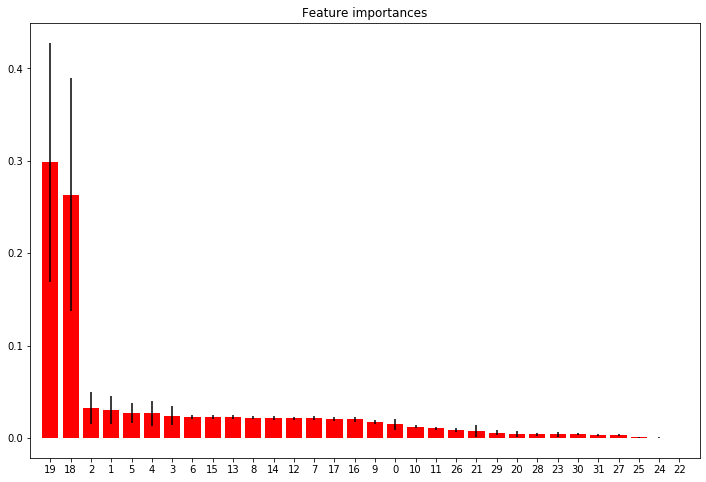

In [73]:
#figure to see importance of different variable  
plt.figure()
plt.title("Feature importances")
plt.bar(range(Independent_Variable.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(Independent_Variable.shape[1]), indices)
plt.xlim([-1, Independent_Variable.shape[1]])
plt.show()

In [74]:
#print independent variable data shape 
print(Independent_Variable.shape)

(24886, 32)


In [75]:
mean =np.mean(importances)
print (mean)

0.03125000000000001


In [76]:
#1. feature 19  'LP_NetPrincipalLoss',
#2. feature 18  'LP_GrossPrincipalLoss',
#3. feature 2  'BorrowerRate',
#4. feature 1  'BorrowerAPR',
#5. feature 5  'ProsperScore',
#6. feature 4  'EstimatedReturn',
#7. feature 3  'EstimatedLoss',
#8. feature 6  'EmploymentStatusDuration',
#9. feature 15  'DebtToIncomeRatio',
#10. feature 13  'BankcardUtilization',
#11. feature 8  'TotalCreditLinespast7years',
#12. feature 14  'AvailableBankcardCredit',
#13. feature 12  'RevolvingCreditBalance',
#14. feature 7  'OpenRevolvingAccounts',
#15. feature 17  'MonthlyLoanPayment',
#16. feature 16  'LoanOriginalAmount',
#17. feature 9  'InquiriesLast6Months',
#18. feature 0 'Term',
#19. feature 10  'CurrentDelinquencies',
#20. feature 11  'AmountDelinquent',

In [77]:
#drop insignificant variable 
Independent_Variable.drop(columns = ['Employed','Full-time','Not employed','Other','Part-time','Retired','$1-24,999','$100,000+','$25,000-49,999','$50,000-74,999','$75,000-99,999'], inplace = True)

# Correlation

In [78]:
#Correlation between 2 variables 
cor = Independent_Variable.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.50) | (cor < -0.50)]

BorrowerRate                BorrowerAPR              0.989747
EstimatedLoss               BorrowerAPR              0.921305
                            BorrowerRate             0.914292
EstimatedReturn             BorrowerAPR              0.734547
                            BorrowerRate             0.767819
ProsperScore                BorrowerAPR             -0.730988
                            BorrowerRate            -0.711754
                            EstimatedLoss           -0.743781
TotalCreditLinespast7years  OpenRevolvingAccounts    0.510511
MonthlyLoanPayment          LoanOriginalAmount       0.859871
LP_NetPrincipalLoss         LP_GrossPrincipalLoss    0.992565
dtype: float64

In [79]:
# method : {‘pearson’, ‘kendall’, ‘spearman’} or callable
Correlation_Variables = Independent_Variable.corr(method='pearson')
Correlation_Variables.head()

,Term,BorrowerAPR,BorrowerRate,EstimatedLoss,EstimatedReturn,ProsperScore,EmploymentStatusDuration,OpenRevolvingAccounts,TotalCreditLinespast7years,InquiriesLast6Months,...,AmountDelinquent,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,DebtToIncomeRatio,LoanOriginalAmount,MonthlyLoanPayment,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,False
Term,1.000000,0.038045,0.121338,-0.042744,0.319602,-0.063418,0.048411,0.037768,0.046288,-0.003589,...,-0.002648,0.019127,0.031117,-0.025538,0.021239,0.360000,0.027285,0.231034,0.232664,-0.043854
BorrowerAPR,0.038045,1.000000,0.989747,0.921305,0.734547,-0.730988,0.028415,-0.098792,0.030647,0.281906,...,0.062803,-0.035050,0.324518,-0.407280,0.127191,-0.308042,-0.195840,0.089869,0.088599,0.094492
BorrowerRate,0.121338,0.989747,1.000000,0.914292,0.767819,-0.711754,0.028006,-0.095999,0.031948,0.277811,...,0.057674,-0.033403,0.319018,-0.396225,0.125898,-0.287874,-0.211033,0.102306,0.100991,0.084503
EstimatedLoss,-0.042744,0.921305,0.914292,1.000000,0.446376,-0.743781,0.023205,-0.105743,0.028741,0.316732,...,0.061476,-0.048773,0.293121,-0.368314,0.118731,-0.348672,-0.230795,0.044618,0.043527,0.081932
EstimatedReturn,0.319602,0.734547,0.767819,0.446376,1.000000,-0.374588,0.020208,-0.053642,0.021112,0.113892,...,0.030180,0.001698,0.240287,-0.299334,0.087458,-0.093968,-0.106210,0.161920,0.160453,0.058462


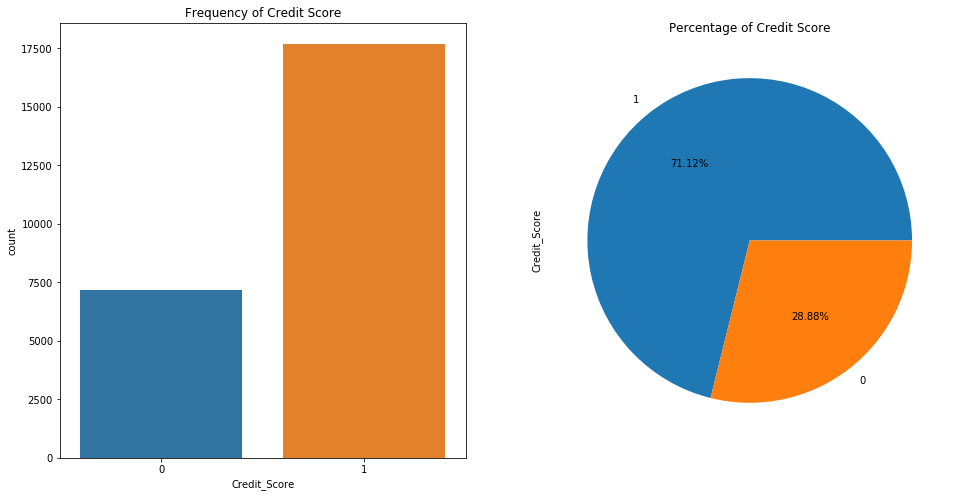

In [80]:
#Visualization
fig, axs = plt.subplots(1,2,figsize=(16,8))
sns.countplot(x='Credit_Score',data=LC_Data_Updated,ax=axs[0])
axs[0].set_title("Frequency of Credit Score")
LC_Data_Updated.Credit_Score.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of Credit Score")
plt.show()

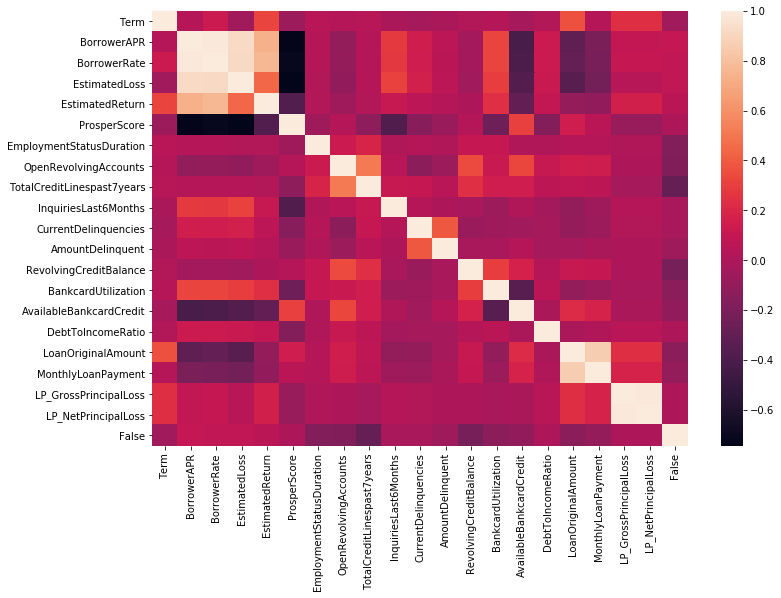

In [81]:
#coorelation metrix in graph 
sns.heatmap(Correlation_Variables) # Heat Map

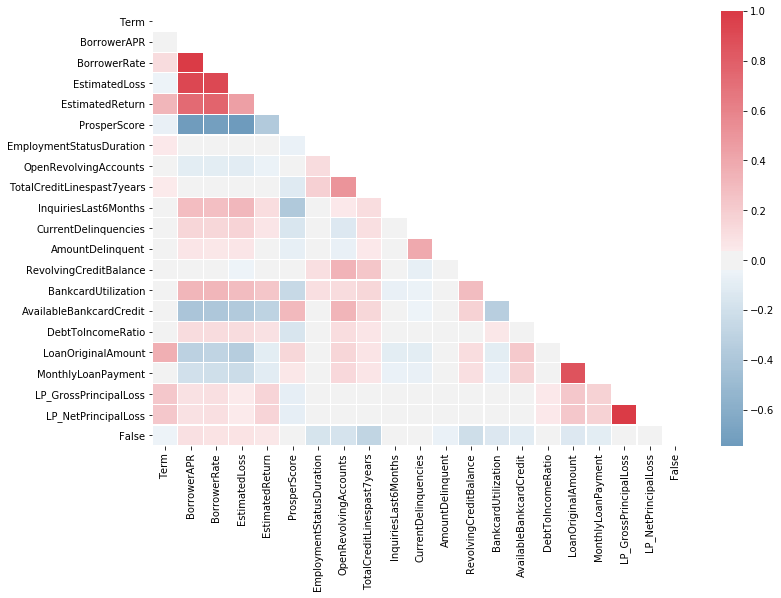

In [82]:
# Removing Top Right Triangle
mask = np.zeros_like(Correlation_Variables, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(Correlation_Variables, mask=mask, linewidths=.15, cmap=cmap, center=0)


In [83]:
#drop independent variables which is highly correlated 
Independent_Variable.drop(columns = ['BorrowerAPR','LP_GrossPrincipalLoss','BorrowerRate','LoanOriginalAmount'], inplace = True)

In [84]:
#correlation with target variable 
Independent_Variable.corrwith(Target_Variable, axis = 0)

Term                         -0.176997
EstimatedLoss                -0.216701
EstimatedReturn              -0.223667
ProsperScore                  0.236467
EmploymentStatusDuration     -0.010766
OpenRevolvingAccounts         0.050231
TotalCreditLinespast7years    0.044272
InquiriesLast6Months         -0.079586
CurrentDelinquencies         -0.084439
AmountDelinquent             -0.025570
RevolvingCreditBalance        0.030948
BankcardUtilization          -0.032660
AvailableBankcardCredit       0.102749
DebtToIncomeRatio            -0.074376
MonthlyLoanPayment           -0.001451
LP_NetPrincipalLoss          -0.597973
False                        -0.043814
dtype: float64

In [85]:
#correlation with independent variable 
cor = Independent_Variable.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.50) | (cor < -0.50)]

ProsperScore                EstimatedLoss           -0.743781
TotalCreditLinespast7years  OpenRevolvingAccounts    0.510511
dtype: float64

In [86]:
Independent_Variable.columns.tolist()

['Term',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperScore',
 'EmploymentStatusDuration',
 'OpenRevolvingAccounts',
 'TotalCreditLinespast7years',
 'InquiriesLast6Months',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'DebtToIncomeRatio',
 'MonthlyLoanPayment',
 'LP_NetPrincipalLoss',
 False]

# Graphical Representation

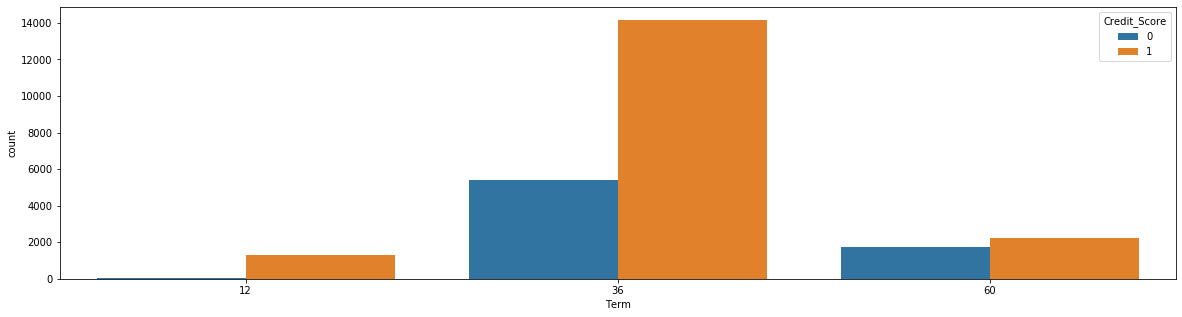

In [88]:
plt.subplots(figsize = (20,5))
sns.countplot(x = 'Term', hue = 'Credit_Score', data = LC_Data_Updated)

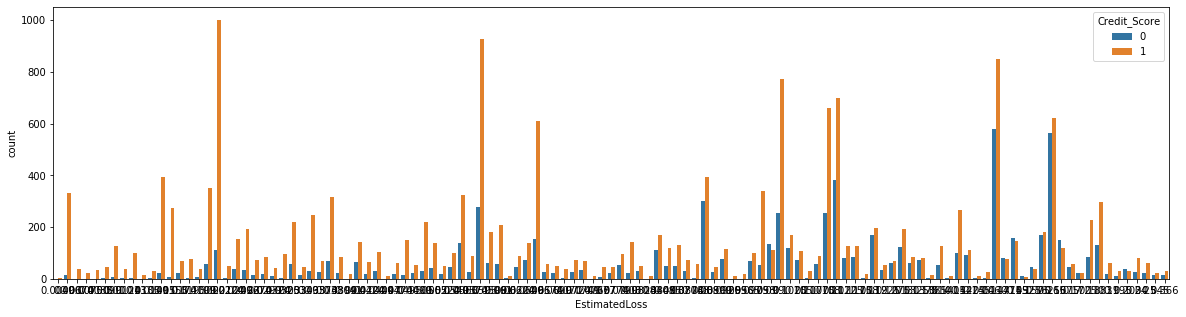

In [89]:
plt.subplots(figsize = (20,5))
sns.countplot(x = 'EstimatedLoss', hue = 'Credit_Score', data = LC_Data_Updated)

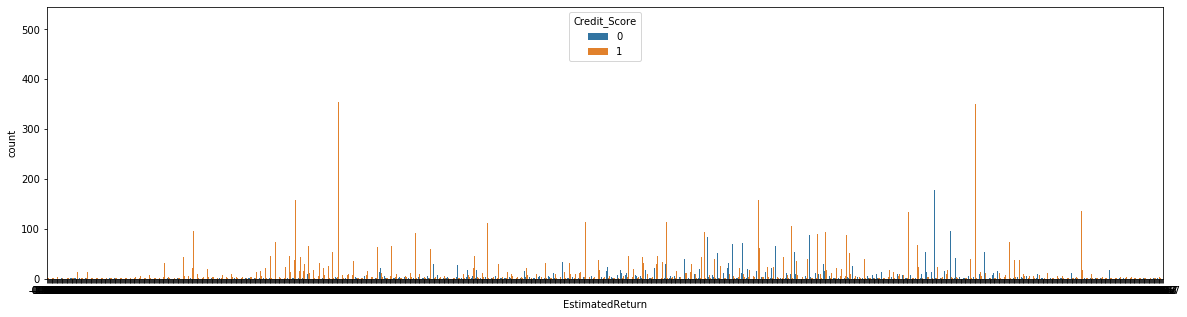

In [90]:
plt.subplots(figsize = (20,5))
sns.countplot(x = 'EstimatedReturn', hue = 'Credit_Score', data = LC_Data_Updated)

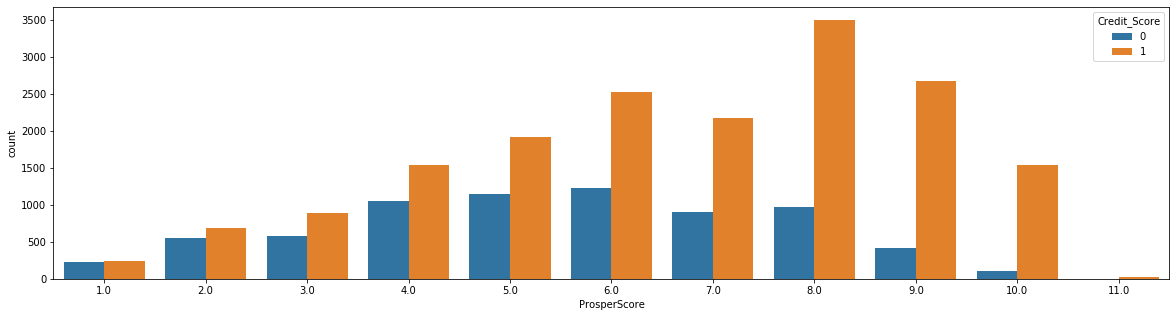

In [91]:
plt.subplots(figsize = (20,5))
sns.countplot(x = 'ProsperScore', hue = 'Credit_Score', data = LC_Data_Updated)

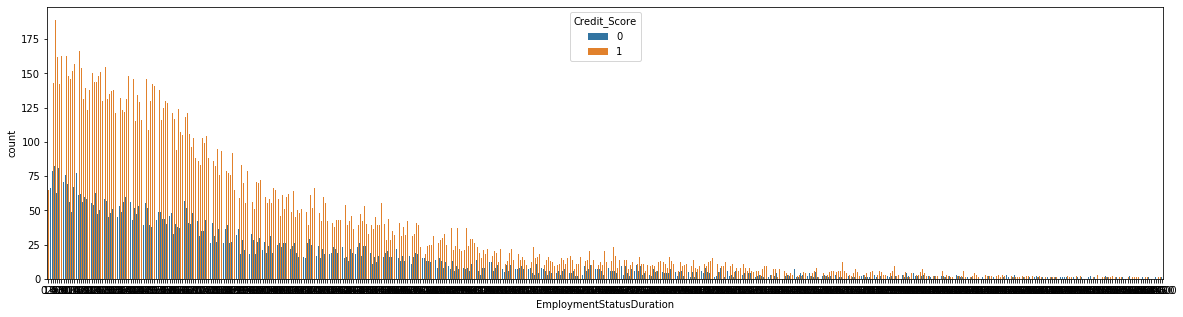

In [92]:
plt.subplots(figsize = (20,5))
sns.countplot(x = 'EmploymentStatusDuration', hue = 'Credit_Score', data = LC_Data_Updated)

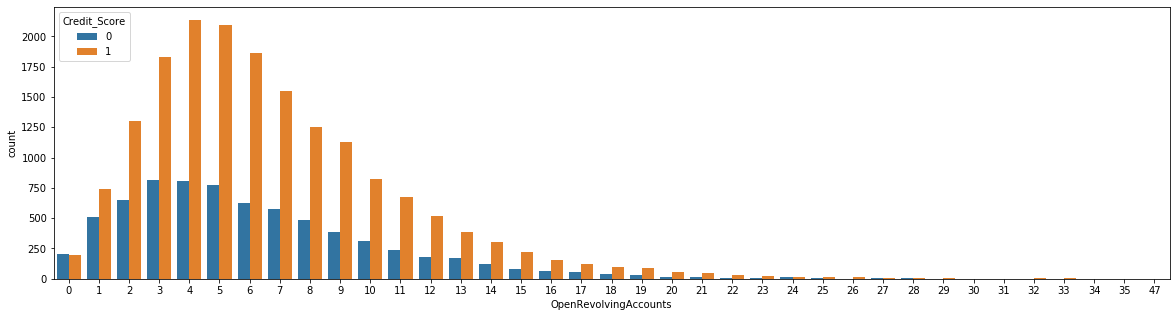

In [93]:
plt.subplots(figsize = (20,5))
sns.countplot(x = 'OpenRevolvingAccounts', hue = 'Credit_Score', data = LC_Data_Updated)

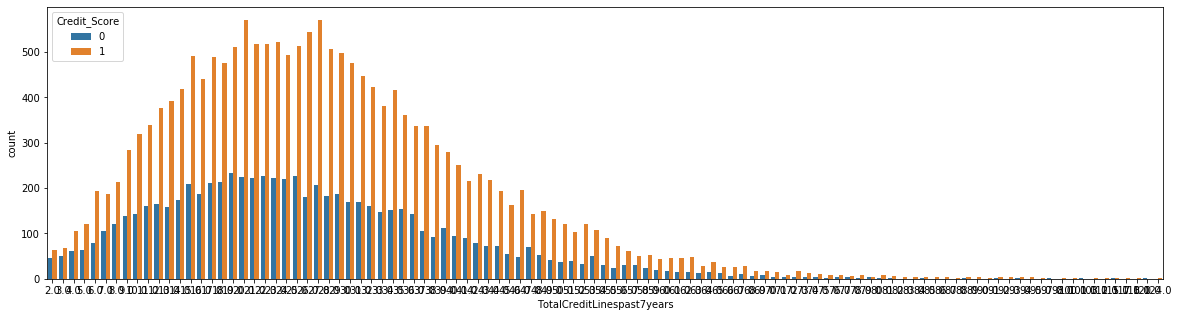

In [94]:
plt.subplots(figsize = (20,5))
sns.countplot(x = 'TotalCreditLinespast7years', hue = 'Credit_Score', data = LC_Data_Updated)

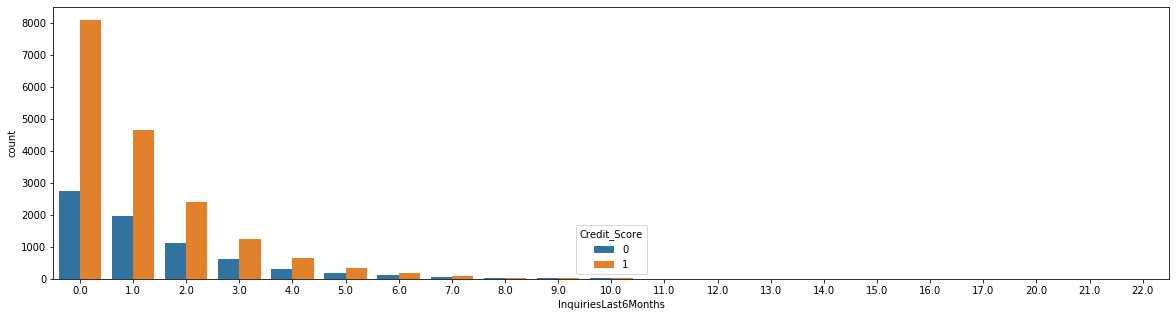

In [95]:
plt.subplots(figsize = (20,5))
sns.countplot(x = 'InquiriesLast6Months', hue = 'Credit_Score', data = LC_Data_Updated)

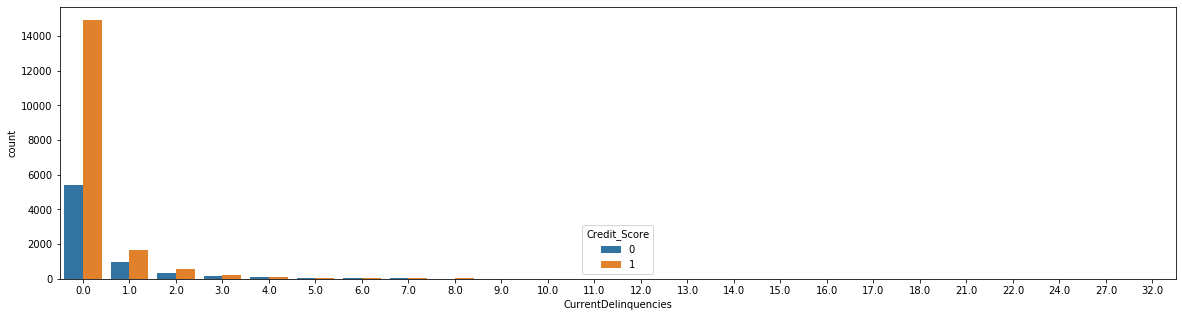

In [96]:
plt.subplots(figsize = (20,5))
sns.countplot(x = 'CurrentDelinquencies', hue = 'Credit_Score', data = LC_Data_Updated)

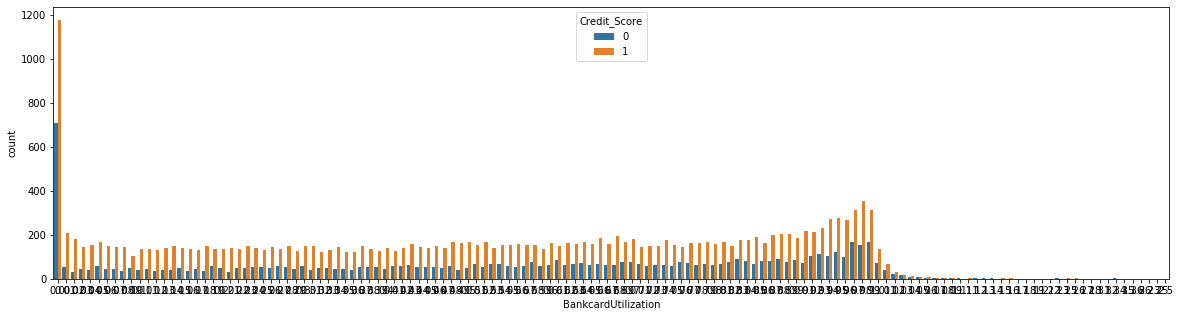

In [97]:
plt.subplots(figsize = (20,5))
sns.countplot(x = 'BankcardUtilization', hue = 'Credit_Score', data = LC_Data_Updated)

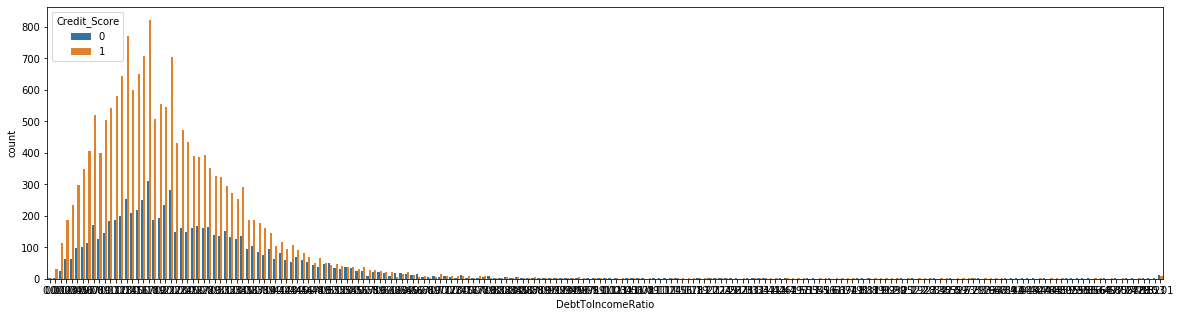

In [98]:
plt.subplots(figsize = (20,5))
sns.countplot(x = 'DebtToIncomeRatio', hue = 'Credit_Score', data = LC_Data_Updated)

# Train-Test Split

In [99]:
#import required libraries
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA
import warnings

import itertools

from imblearn.over_sampling import SMOTE

In [100]:
#split dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(Independent_Variable, Target_Variable, test_size=0.2, random_state=42)

In [101]:
#print train & test data shape 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(19908, 17) (19908,)
(4978, 17) (4978,)


# Undersampling

In [102]:
# describes info about train and test set 
print("Number of X_train data: ", X_train.shape) 
print("Number of y_train data: ", y_train.shape) 
print("Number of X_test data: ", X_test.shape) 
print("Number of y_test data: ", y_test.shape) 

Number of X_train data:  (19908, 17)
Number of y_train data:  (19908,)
Number of X_test data:  (4978, 17)
Number of y_test data:  (4978,)


In [103]:
#print before undersampling data 
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before UnderSampling, counts of label '1': 14162
Before UnderSampling, counts of label '0': 5746 



In [104]:
#import required libraries 
from imblearn.under_sampling import RandomUnderSampler

In [105]:
#undersampling 
rus = RandomUnderSampler(random_state= 42)
X_train_Undersample, y_train_Undersample = rus.fit_sample(X_train, y_train)

In [106]:
#print data set after undersampling 
print('After Undersampling of data, the shape of train_X: {}'.format(X_train_Undersample.shape)) 
print('After Undersampling of data, the shape of train_y: {} \n'.format(y_train_Undersample.shape)) 
  
print("After Undersampling of data, counts of label '1': {}".format(sum(y_train_Undersample == 1))) 
print("After Undersampling of data, counts of label '0': {}".format(sum(y_train_Undersample == 0))) 

After Undersampling of data, the shape of train_X: (11492, 17)
After Undersampling of data, the shape of train_y: (11492,) 

After Undersampling of data, counts of label '1': 5746
After Undersampling of data, counts of label '0': 5746


# Evaluation Metrics

In [107]:
#import required libraries
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB

In [108]:
#Confusion Matrics
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [109]:
#ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [110]:
#roc curve function 
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Classification Models

# Decision Tree

In [111]:
clf_tree = DecisionTreeClassifier()

In [112]:
clf_tree.fit(X_train_Undersample, y_train_Undersample)

DecisionTreeClassifier()

In [113]:
y_pred_tree = clf_tree.predict_proba(X_test)[:,1]

In [114]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.63      0.83      0.72      1440
           1       0.92      0.80      0.86      3538

    accuracy                           0.81      4978
   macro avg       0.78      0.82      0.79      4978
weighted avg       0.84      0.81      0.82      4978



Confusion matrix, without normalization
[[1198  242]
 [ 697 2841]]


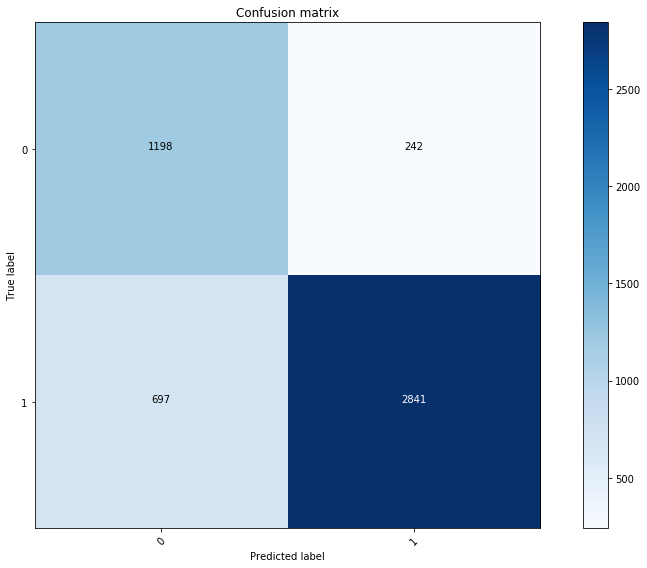

In [115]:
cnf_matrix = confusion_matrix(y_test, y_pred_tree)
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [116]:
# Creating true and false positive rates
false_positive_rate_tree, true_positive_rate_tree, threshold_tree = roc_curve(y_test, y_pred_tree)

In [117]:
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_pred_tree))

roc_auc_score for DecisionTree:  0.8174702437032849


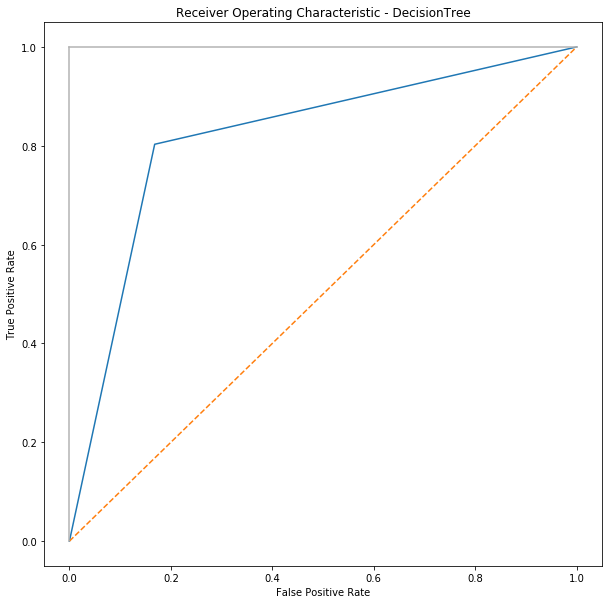

In [118]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate_tree, true_positive_rate_tree)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [120]:
#import required libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from numpy import mean
from numpy import std

In [121]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [122]:
scores = cross_val_score(clf_tree, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.819 (0.009)


# Logistic Regression

In [123]:
clf_reg = LogisticRegression()

In [124]:
clf_reg.fit(X_train_Undersample, y_train_Undersample)

LogisticRegression()

In [125]:
y_pred_reg = clf_reg.predict_proba(X_test)[:,1]

In [126]:
print(classification_report(y_test, y_pred_reg.round())) 

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1440
           1       0.91      0.96      0.93      3538

    accuracy                           0.90      4978
   macro avg       0.89      0.85      0.87      4978
weighted avg       0.90      0.90      0.90      4978



Confusion matrix, without normalization
[[1085  355]
 [ 155 3383]]


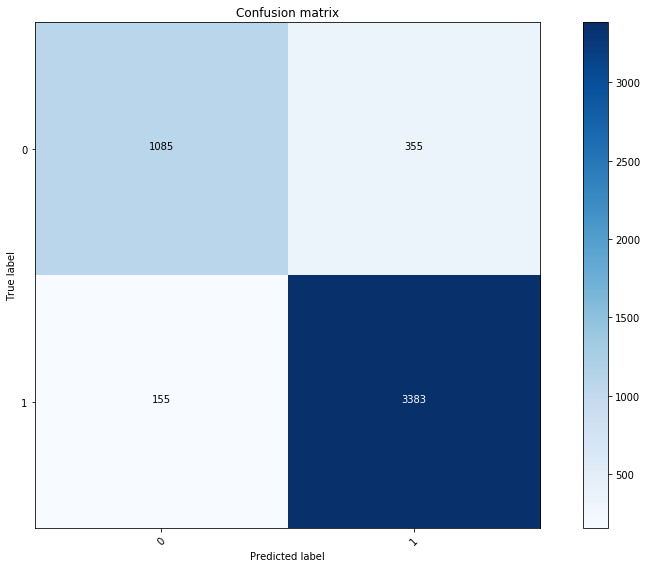

In [127]:
cnf_matrix = confusion_matrix(y_test, y_pred_reg.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [128]:
# Creating true and false positive rates
false_positive_rate_reg, true_positive_rate_reg, threshold_reg = roc_curve(y_test, y_pred_reg)

In [129]:
print('roc_auc_score for LogisticRegression: ', roc_auc_score(y_test, y_pred_reg))

roc_auc_score for LogisticRegression:  0.9311487186734502


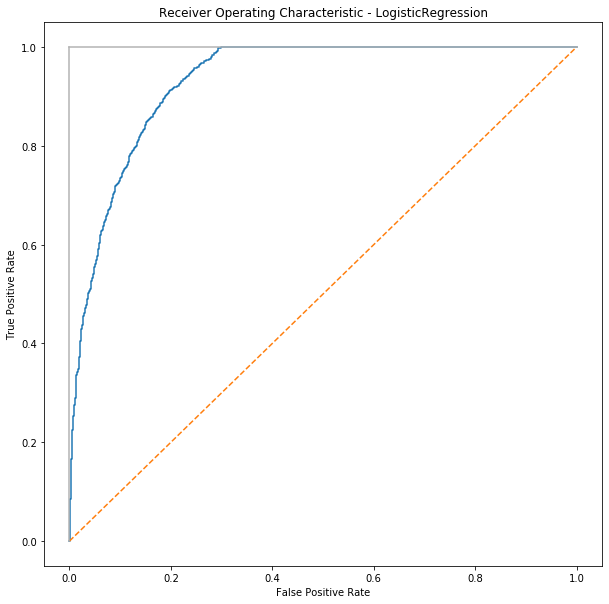

In [130]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - LogisticRegression')
plt.plot(false_positive_rate_reg, true_positive_rate_reg)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [131]:
scores = cross_val_score(clf_reg, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.855 (0.009)


# Naive Bayes

In [132]:
clf_NB = GaussianNB()

In [133]:
clf_NB.fit(X_train_Undersample, y_train_Undersample)

GaussianNB()

In [134]:
y_pred_NB = clf_NB.predict_proba(X_test)[:,1]

In [135]:
print(classification_report(y_test, y_pred_NB.round())) 


              precision    recall  f1-score   support

           0       0.96      0.72      0.82      1440
           1       0.90      0.99      0.94      3538

    accuracy                           0.91      4978
   macro avg       0.93      0.86      0.88      4978
weighted avg       0.92      0.91      0.91      4978



Confusion matrix, without normalization
[[1043  397]
 [  46 3492]]


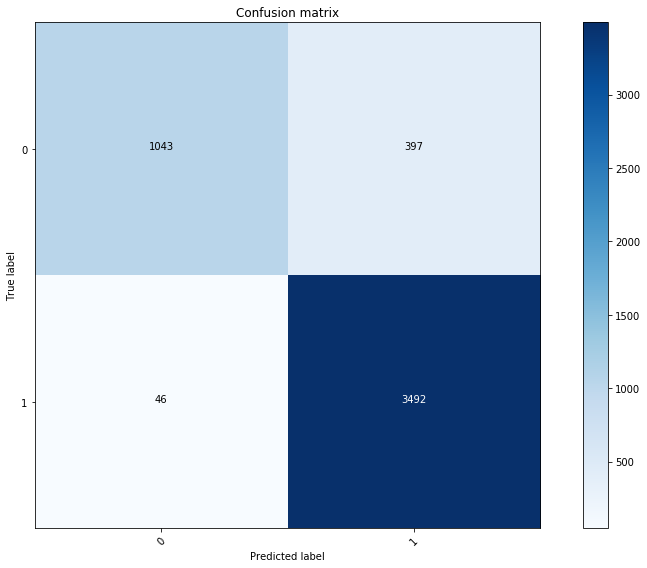

In [136]:
cnf_matrix = confusion_matrix(y_test, y_pred_NB.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [137]:
# Creating true and false positive rates
false_positive_rate_NB, true_positive_rate_NB, threshold_NB = roc_curve(y_test, y_pred_NB)

In [138]:
print('roc_auc_score for Naive Bayes: ', roc_auc_score(y_test, y_pred_NB))

roc_auc_score for Naive Bayes:  0.9120982114816909


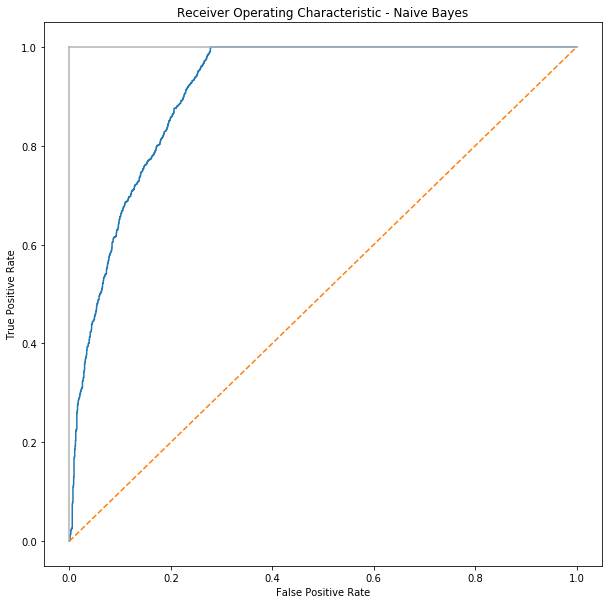

In [139]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(false_positive_rate_NB, true_positive_rate_NB)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [140]:
scores = cross_val_score(clf_NB, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.859 (0.010)


# RandomForestClassifier

In [141]:
clf_rf = RandomForestClassifier()

In [142]:
clf_rf.fit(X_train_Undersample, y_train_Undersample)

RandomForestClassifier()

In [143]:
y_pred_rf = clf_rf.predict_proba(X_test)[:,1]

In [144]:
print(classification_report(y_test, y_pred_rf.round()))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1440
           1       0.92      0.94      0.93      3538

    accuracy                           0.89      4978
   macro avg       0.87      0.86      0.87      4978
weighted avg       0.89      0.89      0.89      4978



Confusion matrix, without normalization
[[1138  302]
 [ 228 3310]]


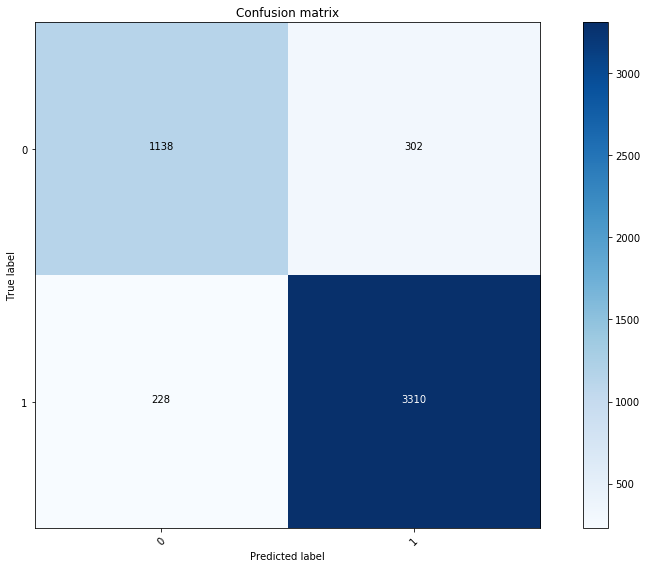

In [145]:
cnf_matrix = confusion_matrix(y_test, y_pred_rf.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [146]:
# Creating true and false positive rates
false_positive_rate_rf, true_positive_rate_rf, threshold_rf = roc_curve(y_test, y_pred_rf)

In [147]:
print('roc_auc_score for RandomForestClassifier: ', roc_auc_score(y_test, y_pred_rf))

roc_auc_score for RandomForestClassifier:  0.941193137208718


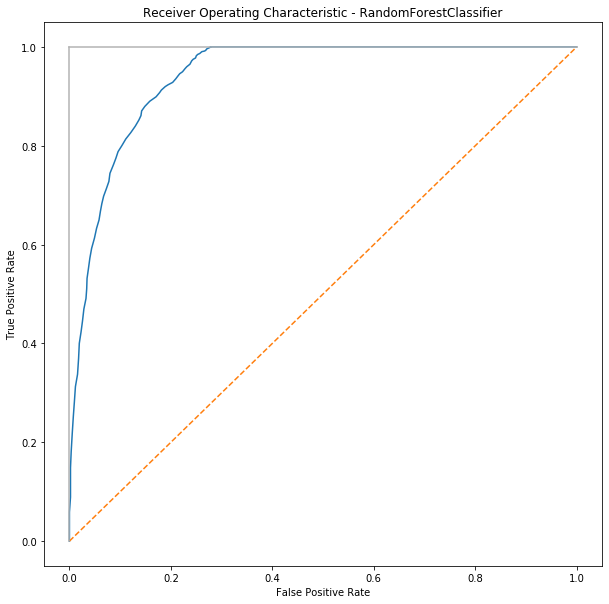

In [148]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(false_positive_rate_rf, true_positive_rate_rf)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [149]:
scores = cross_val_score(clf_rf, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.869 (0.010)


# Support Vector Machine

In [156]:
clf_svm = svm.SVC(random_state=123)

In [157]:
clf_svm.fit(X_train_Undersample, y_train_Undersample)

SVC(random_state=123)

In [158]:
y_pred_SVM= clf_svm.predict(X_test)

In [159]:
print(classification_report(y_test, y_pred_SVM.round())) 

              precision    recall  f1-score   support

           0       0.93      0.71      0.81      1440
           1       0.89      0.98      0.93      3538

    accuracy                           0.90      4978
   macro avg       0.91      0.85      0.87      4978
weighted avg       0.90      0.90      0.90      4978



Confusion matrix, without normalization
[[1027  413]
 [  79 3459]]


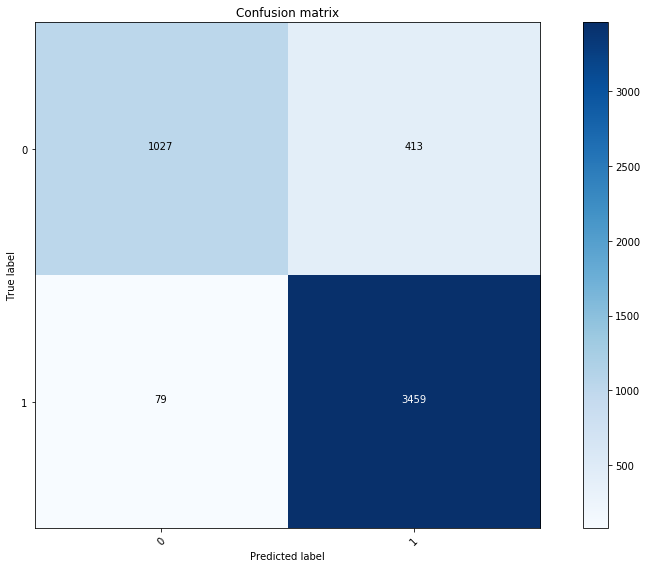

In [160]:
cnf_matrix = confusion_matrix(y_test, y_pred_SVM.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [161]:
# Creating true and false positive rates
false_positive_rate_SVM, true_positive_rate_SVM, threshold_SVM = roc_curve(y_test, y_pred_SVM)

In [162]:
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_pred_SVM))

roc_auc_score for SVM:  0.8454327225048678


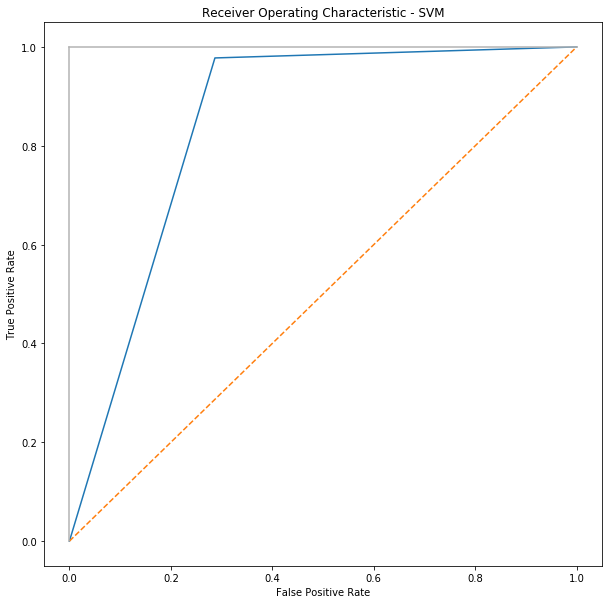

In [164]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate_SVM, true_positive_rate_SVM)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [165]:
scores = cross_val_score(clf_svm, X_train_Undersample,y_train_Undersample, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.845 (0.013)
